In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense, Flatten, Input, SimpleRNN, LSTM
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD

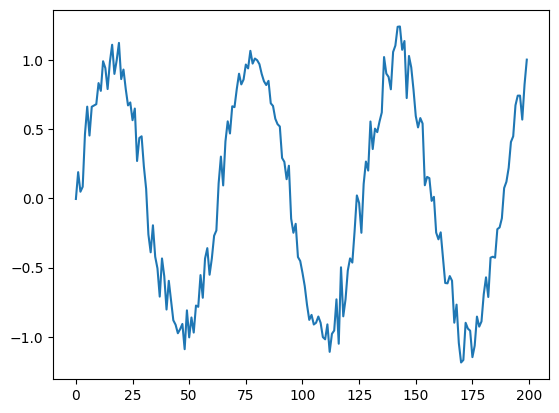

In [2]:
series = np.sin(0.1*np.arange(200)) + np.random.randn(200)*0.1

plt.plot(series)
plt.show()

In [3]:
T = 10
D = 1
X = []
Y = []

for t in range(len(series) - T):
  x = series [t : t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T, 1)
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (190, 10, 1) Y.shape (190,)


In [4]:
i = Input(shape=(T,1))
x = LSTM(5)(i)
x = Dense(1)(x)

model = Model(i,x)
model.compile(
    loss='mse',
    optimizer=Adam(learning_rate=0.1)
)

r = model.fit(X[:-N//2], Y[:-N//2], epochs=80, validation_data=(X[-N//2:], Y[-N//2:]))

Epoch 1/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 460ms/step - loss: 0.2871 - val_loss: 0.1971
Epoch 2/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.1552 - val_loss: 0.0841
Epoch 3/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0506 - val_loss: 0.0624
Epoch 4/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0380 - val_loss: 0.0551
Epoch 5/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0324 - val_loss: 0.0366
Epoch 6/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0260 - val_loss: 0.0351
Epoch 7/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0233 - val_loss: 0.0287
Epoch 8/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0202 - val_loss: 0.0302
Epoch 9/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0221 - val_loss: 0.0284
Epoch 10/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0225 - val_loss: 0.0295
Epoch 11/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0218 - val_loss: 0.0279
Epoch 12/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0226 - val_loss: 0.0277


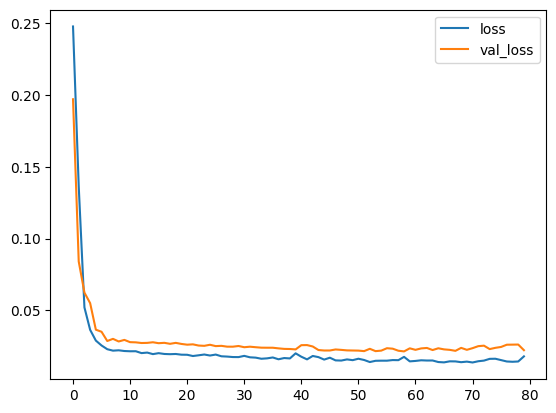

In [5]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━

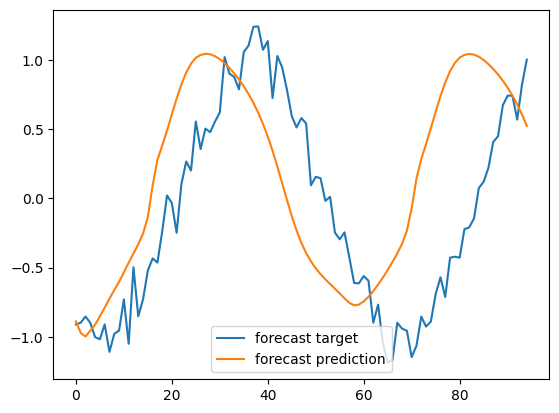

In [6]:
validation_target = Y[-N//2:]
validation_predictions = []

last_x = X[-N//2]

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1, T, 1))[0,0]
  validation_predictions.append(p)

  last_x = np.roll(last_x, -1)
  last_x[-1] = p

plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()